**Imports**

In [220]:
# For plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd

# For HTML
from bs4 import BeautifulSoup
import requests

# For colors
colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

### **Exercise 1**

**Data scrape (2014)**

In [221]:
URL = "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2024/data/2014KenPomeroy.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content,"html.parser")
table = soup.find('table')

In [222]:
table = soup.find('table') # Find the table

temporary = [] # Temporary list for appending info to 

for row in table.find_all('tr'): # Extract the rows
    cells = row.find_all('td') # Get cells
    if len(cells) > 0:  # Skips header
        team_name = cells[0].text.strip()
        rank = cells[1].text.strip()
        conf = cells[2].text.strip()
        WL_ratio = cells[3].text.strip()
        AdjEM = cells[4].text.strip()
        AdjO = cells[5].text.strip()
        AdjD = cells[7].text.strip()
        AdjT = cells[9].text.strip()
        Luck = cells[11].text.strip()
        temporary.append([team_name,rank,conf,WL_ratio,AdjEM,AdjO,AdjD,AdjT,Luck]) # Just get some of the info
        
df = pd.DataFrame(temporary, columns=['-', 'Team', 'Conference', 'W-L Ratio', 'AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck'])
df = df.iloc[:, 1:] # Remove the initial column
df[df.columns[0]] = df[df.columns[0]].str.replace(r'\d+', '', regex=True).str.strip() # Remove any additional number

**Plotting**

In [223]:
conferences = {'ACC': [],'SEC': [],'B10': [],'BSky': [],'A10': []} # Five conferences of interest

for index,rows in df.iterrows(): # Iterate over rows
    conference = rows['Conference'] 
    AdjD = rows['AdjD']
    if conference in conferences: # Check if conference is one of the five
        conferences[conference].append(float(AdjD))
    else: pass

Barstacked

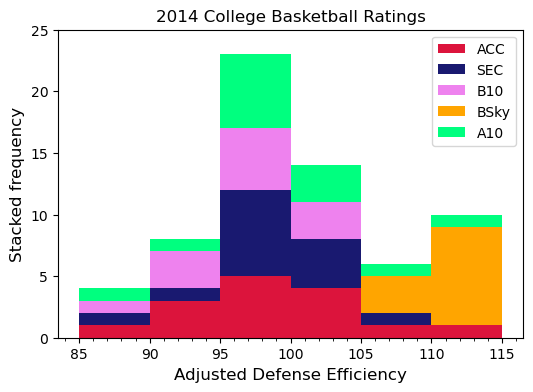

In [224]:
plt.figure(figsize=(6, 4))

bins = np.arange(85,116,5) # Set range of bins

data = [values for values in conferences.values()] # Data from values
labels = [team for team in conferences.keys()] # Get labels

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.hist(data, bins=bins, alpha=1., linewidth=1, label=labels, histtype='barstacked',zorder=1)
plt.yticks(range(0,26,5))
plt.title('2014 College Basketball Ratings',fontsize=12)
plt.xlabel('Adjusted Defense Efficiency',fontsize=12)
plt.ylabel('Stacked frequency',fontsize=12)
plt.legend()
plt.savefig('StackedHistograms.pdf')
plt.show()

Grouped

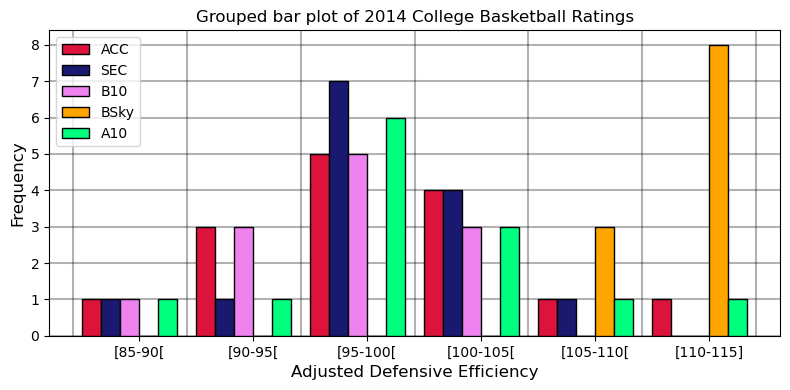

In [225]:
bins = [85, 90, 95, 100, 105, 110, 115] # Set bin range

n_datasets = len(data)
bar_width = 1.0 / (n_datasets + 1)  # Padding between groups
bin_labels = [f'[{bins[i]}-{bins[i+1]}[' for i in range(len(bins)-1)] # Set labels to bin range
bin_labels[-1] = f'[{bins[5]}-{bins[-1]}]' # Set special case for the bin range

plt.figure(figsize=(8,4))
ax = plt.subplot(111)

for i, dataset in enumerate(data):
    hist, _ = np.histogram(dataset, bins=bins)
    positions = np.arange(len(bins) - 1) + i * bar_width
    ax.bar(positions, hist, width=bar_width, alpha=1.,label=f'{labels[i]}',zorder=10,edgecolor='black')

ax.set_xticks(np.arange(len(bins) - 1) + bar_width * n_datasets / 2)
ax.set_xticklabels(bin_labels)

for i in range(0,9): # Add horizontal lines
    plt.axhline(y=i, color='k',alpha=0.3,zorder=0)
for bin_edge in range(0,len(bins)): # Set vertical lines
    line_position = bin_edge - bar_width
    ax.axvline(x=line_position, color='k',alpha=0.3)
    
ax.set_axisbelow(True)

plt.xlabel('Adjusted Defensive Efficiency',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Grouped bar plot of 2014 College Basketball Ratings',fontsize=12)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('GroupedHistograms.pdf')
plt.show()

### **Exercise 2**

**Data scrape (2009)**

In [226]:
URL_2 = "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2024/data/2009KenPomeroy.html"
page_2 = requests.get(URL_2)
soup_2 = BeautifulSoup(page_2.content,"html.parser")
table_2 = soup_2.find('table')

In [227]:
temporary_2 = []

for row in table_2.find_all('tr'): # Extract the rows
    cells = row.find_all('td') # Get cells
    if len(cells) > 0:  # Skips header
        team_name = cells[0].text.strip()
        rank = cells[1].text.strip() # Not sure what this is 
        conf = cells[2].text.strip()
        WL_ratio = cells[3].text.strip()
        AdjEM = cells[4].text.strip()
        AdjO = cells[5].text.strip()
        AdjD = cells[7].text.strip()
        AdjT = cells[9].text.strip()
        Luck = cells[11].text.strip()
        temporary_2.append([team_name,rank,conf,WL_ratio,AdjEM,AdjO,AdjD,AdjT,Luck])
        
df_2 = pd.DataFrame(temporary_2, columns=['-', 'Team', 'Conference', 'W-L Ratio', 'AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck'])
df_2 = df_2.iloc[:, 1:] # Remove the initial column
df_2[df_2.columns[0]] = df_2[df_2.columns[0]].str.replace(r'\d+', '', regex=True).str.strip() # Remove any additional number

In [228]:
conferences = {'ACC': [],'SEC': [],'B10': [],'BSky': [],'A10': []}
sad = {'rejects':[]}

for index,rows in df.iterrows(): # Iterate over 2014 df
    
    conference = rows['Conference'] 
    team = rows['Team']
    AdjO = rows['AdjO']
    
    if conference in conferences: # Check if conference is one of 5
        for index_2,rows_2 in df_2.iterrows(): # Loop over 2009 data
            team_2009 = rows_2['Team']
            AdjO_2009 = rows_2['AdjO']
            conference_2009 = rows_2['Conference']
            if team == team_2009 and conference == conference_2009: # If same team found, find difference
                conferences[conference].append([float(AdjO)-float(AdjO_2009),float(AdjO_2009)])

    else:
        for index_2,rows_2 in df_2.iterrows(): # Loop over teams not in the included conferences
            team_2009 = rows_2['Team']
            AdjO_2009 = rows_2['AdjO']
            conference_2009 = rows_2['Conference']
            if team == team_2009 and conference == conference_2009:
                sad['rejects'].append([float(AdjO)-float(AdjO_2009),float(AdjO_2009)])

**2009 to 2014 change in AdjO**

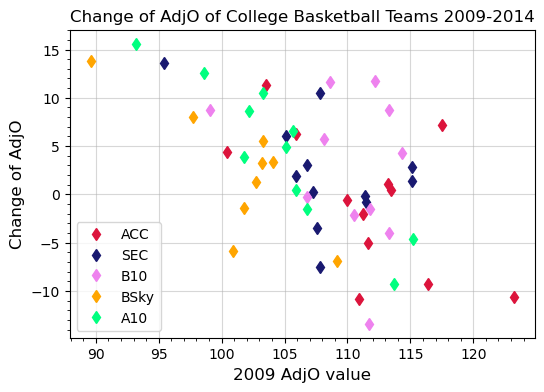

In [229]:
plt.figure(figsize=(6, 4))

for key,value in conferences.items():
    x_values = [v[1] for v in value]
    y_values = [v[0] for v in value]
    plt.errorbar(x_values,y_values, marker='d', linestyle='',alpha=1., label=f'{key}')

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')
plt.grid(True,alpha=0.5,zorder=-10)

plt.title('Change of AdjO of College Basketball Teams 2009-2014',fontsize=12)
plt.xlabel('2009 AdjO value',fontsize=12)
plt.ylabel('Change of AdjO',fontsize=12)
plt.legend()
plt.savefig('ChangeAdjO.pdf')
plt.show()

**Mean and median**

In [230]:
means = []
medians = []

for key,value in conferences.items(): # Compute means+median for the included conferences
    adjo_changes = [v[0] for v in value]
    means.append(np.mean(adjo_changes))
    medians.append(np.median(adjo_changes))
    
print(means)
print(medians)

[-0.6250000000000036, 2.2833333333333337, 2.6727272727272746, 2.3222222222222246, 4.336363636363635]
[-0.04999999999999716, 1.6499999999999986, 4.299999999999997, 3.200000000000003, 4.900000000000006]


In [231]:
sad['rejects'][0]

for key,value in sad.items():
    adjo_changes = [v[0] for v in value]
    print(np.mean(adjo_changes))
    print(np.median(adjo_changes))

2.8095693779904307
2.0


### **Exercise 3** 

**Histogram plot of 2014 (with BE)**

In [232]:
conferences = {'ACC': [],'SEC': [],'B10': [],'BSky': [],'A10': [],'BE':[]}

for index,rows in df.iterrows(): # Iterate over rows
    conference = rows['Conference']
    AdjD = rows['AdjD']
    if conference in conferences: # Check if conference is one of the five
        conferences[conference].append(float(AdjD))
    else: pass

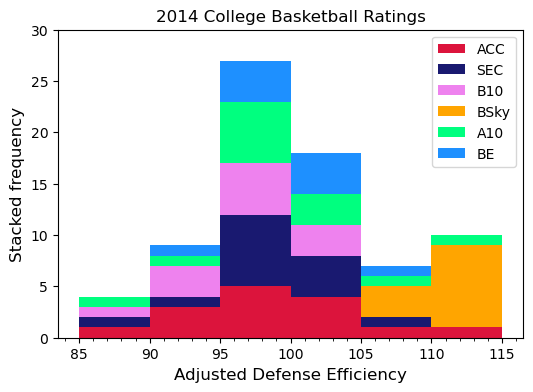

In [233]:
plt.figure(figsize=(6, 4))

bins = np.arange(85,116,5)

data = [values for values in conferences.values()]
labels = [team for team in conferences.keys()]

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.hist(data, bins=bins, alpha=1., linewidth=1, label=labels, histtype='barstacked',zorder=1)
plt.yticks(range(0,31,5))
plt.title('2014 College Basketball Ratings',fontsize=12)
plt.xlabel('Adjusted Defense Efficiency',fontsize=12)
plt.ylabel('Stacked frequency',fontsize=12)
plt.legend()
plt.savefig('StackedHistograms.pdf')
plt.show()

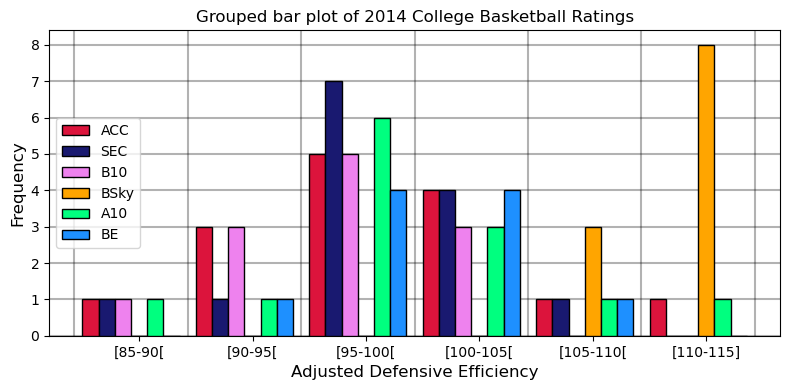

In [234]:
bins = [85, 90, 95, 100, 105, 110, 115]

n_datasets = len(data)
bar_width = 1.0 / (n_datasets + 1)
bin_labels = [f'[{bins[i]}-{bins[i+1]}[' for i in range(len(bins)-1)]
bin_labels[-1] = f'[{bins[5]}-{bins[-1]}]'

plt.figure(figsize=(8,4))
ax = plt.subplot(111)

for i, dataset in enumerate(data):
    hist, _ = np.histogram(dataset, bins=bins)
    positions = np.arange(len(bins) - 1) + i * bar_width
    ax.bar(positions, hist, width=bar_width, alpha=1.,label=f'{labels[i]}',zorder=10,edgecolor='black')

ax.set_xticks(np.arange(len(bins) - 1) + bar_width * n_datasets / 2)
ax.set_xticklabels(bin_labels)

for i in range(0,9):
    plt.axhline(y=i, color='k',alpha=0.3,zorder=0)
for bin_edge in range(0,len(bins)):
    line_position = bin_edge - bar_width
    ax.axvline(x=line_position, color='k',alpha=0.3)
    
ax.set_axisbelow(True)

plt.xlabel('Adjusted Defensive Efficiency',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Grouped bar plot of 2014 College Basketball Ratings',fontsize=12)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('GroupedHistograms_BE.pdf')
plt.show()

**2009 to 2014 change in AdjO (with BE)**

In [235]:
conferences = {'ACC': [],'SEC': [],'B10': [],'BSky': [],'A10': [],'BE':[]}

for index,rows in df.iterrows(): # Iterate over 2014 df
    
    conference = rows['Conference'] 
    team = rows['Team']
    AdjO = rows['AdjO']
    
    if conference in conferences: # Check if conference is one of 5
        for index_2,rows_2 in df_2.iterrows(): # Loop over 2009 df
            team_2009 = rows_2['Team']
            AdjO_2009 = rows_2['AdjO']
            conference_2009 = rows_2['Conference']
            if team == team_2009 and conference == conference_2009: # If same team found, find difference
                conferences[conference].append([float(AdjO)-float(AdjO_2009),float(AdjO_2009)])

    else:
        for index_2,rows_2 in df_2.iterrows(): # Loop over 2009 df
            team_2009 = rows_2['Team']
            AdjO_2009 = rows_2['AdjO']
            conference_2009 = rows_2['Conference']
            if team == team_2009 and conference == conference_2009:
                sad['rejects'].append([float(AdjO)-float(AdjO_2009),float(AdjO_2009)])

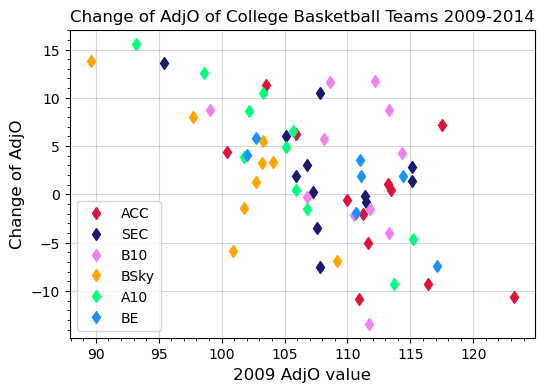

In [236]:
plt.figure(figsize=(6, 4))

for key,value in conferences.items():
    x_values = [v[1] for v in value]
    y_values = [v[0] for v in value]
    plt.errorbar(x_values,y_values, marker='d', linestyle='',alpha=1., label=f'{key}')

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')
plt.grid(True,alpha=0.5,zorder=-10)

plt.title('Change of AdjO of College Basketball Teams 2009-2014',fontsize=12)
plt.xlabel('2009 AdjO value',fontsize=12)
plt.ylabel('Change of AdjO',fontsize=12)
plt.legend()
plt.savefig('ChangeAdjO_BE.pdf')
plt.show()

**Mean and median**

In [237]:
means = []
medians = []

for key,value in conferences.items(): # Compute means+median for the included conferences
    adjo_changes = [v[0] for v in value]
    means.append(np.mean(adjo_changes))
    medians.append(np.median(adjo_changes))
    
print(means)
print(medians)

[-0.6250000000000036, 2.2833333333333337, 2.6727272727272746, 2.3222222222222246, 4.336363636363635, 1.1428571428571408]
[-0.04999999999999716, 1.6499999999999986, 4.299999999999997, 3.200000000000003, 4.900000000000006, 1.9000000000000057]


In [238]:
sad['rejects'][0]

for key,value in sad.items():
    adjo_changes = [v[0] for v in value]
    print(np.mean(adjo_changes))
    print(np.median(adjo_changes))

2.8379562043795623
2.0
